# <span style='color:orange'> Continuous Probabilistic Methods

In [4]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt


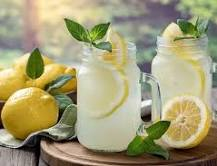

### 1. Using lemonade.csv dataset and focusing on continuous variables:

In [5]:


def get_lemonade_data():
    '''
    This function acquires the lemondade csv
    '''
    filename = 'lemondade.csv'

    # Verify if file exists
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    # Download data if file doesn't exist
    else:
        url = "https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv"
        try:
            df = pd.read_csv(url)
            df.to_csv(filename, index=False)
            print("Data acquired and saved successfully.")
            return df
        except Exception as e:
            print("Error while downloading the data:", e)
            return None


In [10]:
df_lemonade = get_lemonade_data()
df_lemonade.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [31]:
df_lemonade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


### a. Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

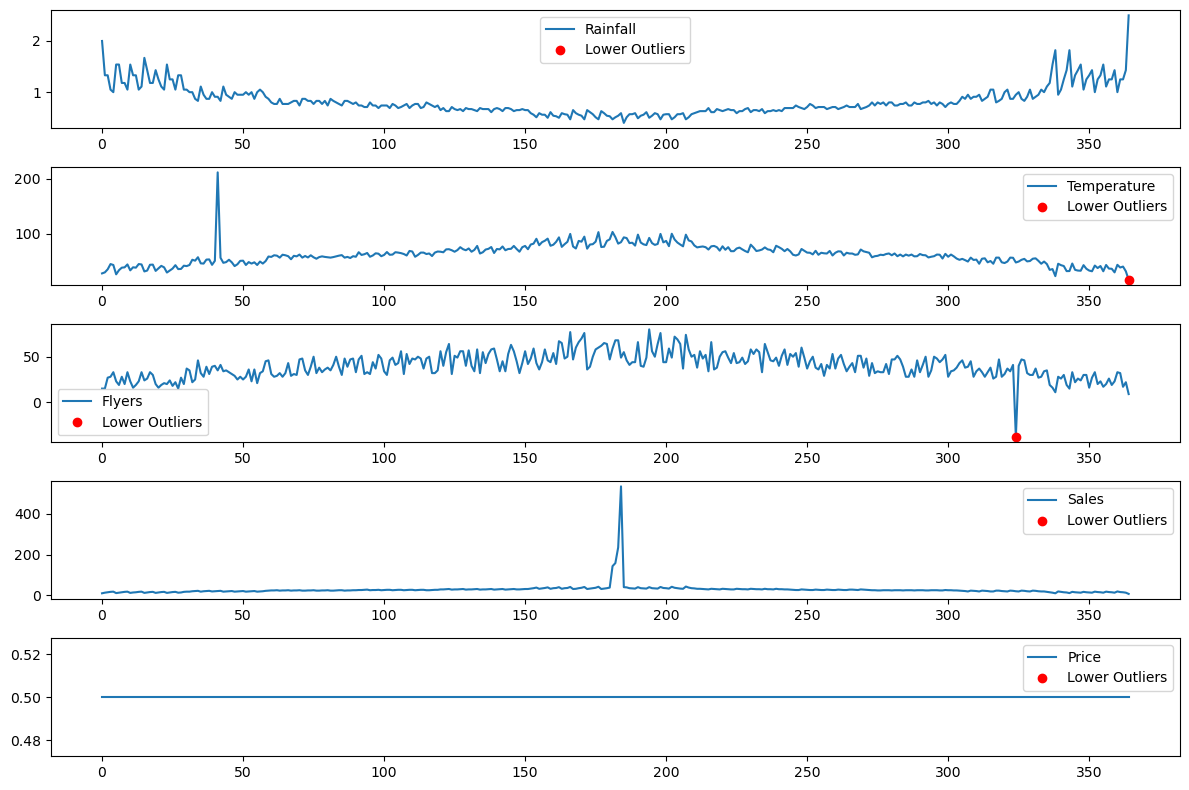

In [49]:

# Define a function to identify lower outliers using the IQR Range Rule
def identify_lower_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    return column[column < lower_bound]

# Create 5 subplots
fig, (ax1, ax2,ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(12, 8))

# Identify lower outliers for the 'Rainfall' column and plot
lower_outliers_day = identify_lower_outliers(df_lemonade['Rainfall'])
ax1.plot(df_lemonade['Rainfall'], label='Rainfall')
ax1.plot(lower_outliers_day, 'ro', label='Lower Outliers')
ax1.legend()


# Identify lower outliers for the 'Temperature' column and plot
lower_outliers_temp = identify_lower_outliers(df_lemonade['Temperature'])
ax2.plot(df_lemonade['Temperature'], label='Temperature')
ax2.plot(lower_outliers_temp, 'ro', label='Lower Outliers')
ax2.legend()

# Identify lower outliers for the 'Flyers' column and plot
lower_outliers_temp = identify_lower_outliers(df_lemonade['Flyers'])
ax3.plot(df_lemonade['Flyers'], label='Flyers')
ax3.plot(lower_outliers_temp, 'ro', label='Lower Outliers')
ax3.legend()

# Identify lower outliers for the 'Flyers' column and plot
lower_outliers_temp = identify_lower_outliers(df_lemonade['Sales'])
ax4.plot(df_lemonade['Sales'], label='Sales')
ax4.plot(lower_outliers_temp, 'ro', label='Lower Outliers')
ax4.legend()

# Identify lower outliers for the 'Flyers' column and plot
lower_outliers_temp = identify_lower_outliers(df_lemonade['Price'])
ax5.plot(df_lemonade['Price'], label='Price')
ax5.plot(lower_outliers_temp, 'ro', label='Lower Outliers')
ax5.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


### b.  Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

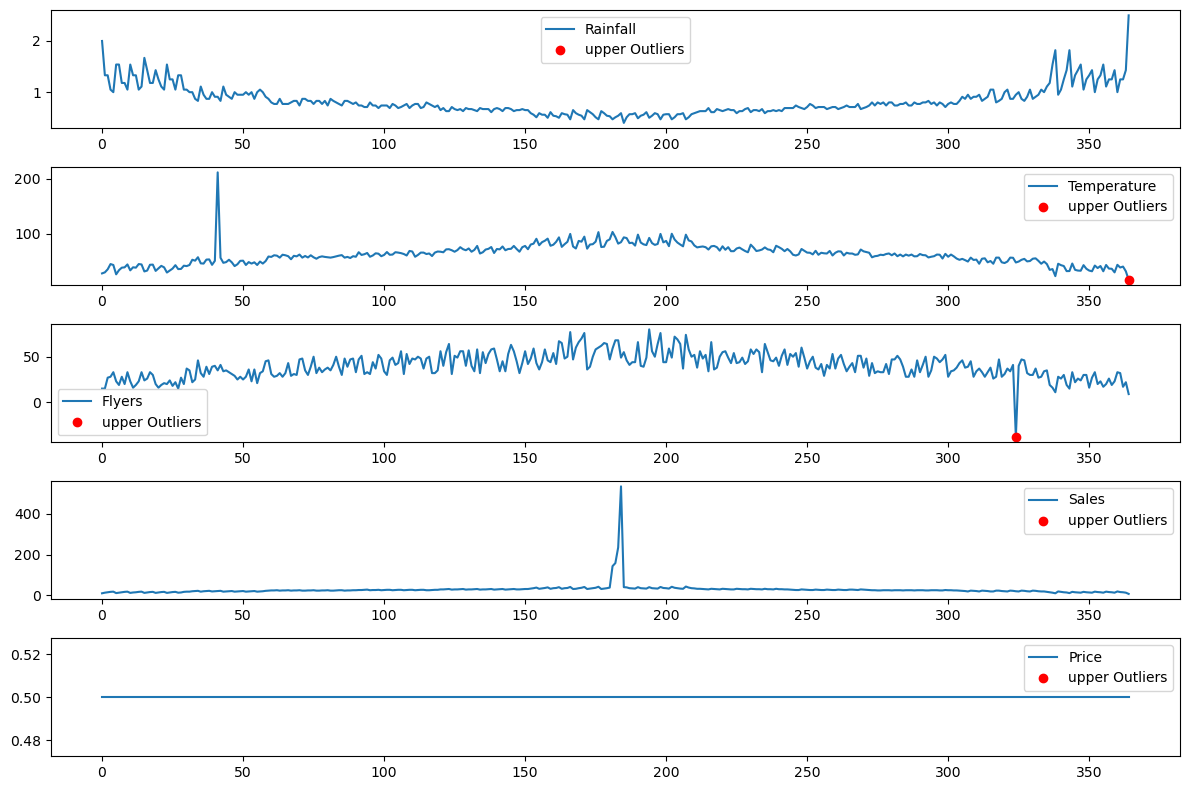

In [50]:

# Define a function to identify upper outliers using the IQR Range Rule
def identify_upper_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q1 - 1.5 * IQR
    return column[column < upper_bound]

# Create 5 subplots
fig, (ax1, ax2,ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(12, 8))

# Identify upper outliers for the 'Rainfall' column and plot
upper_outliers_day = identify_upper_outliers(df_lemonade['Rainfall'])
ax1.plot(df_lemonade['Rainfall'], label='Rainfall')
ax1.plot(upper_outliers_day, 'ro', label='upper Outliers')
ax1.legend()


# Identify upper outliers for the 'Temperature' column and plot
upper_outliers_temp = identify_upper_outliers(df_lemonade['Temperature'])
ax2.plot(df_lemonade['Temperature'], label='Temperature')
ax2.plot(upper_outliers_temp, 'ro', label='upper Outliers')
ax2.legend()

# Identify upper outliers for the 'Flyers' column and plot
upper_outliers_temp = identify_upper_outliers(df_lemonade['Flyers'])
ax3.plot(df_lemonade['Flyers'], label='Flyers')
ax3.plot(upper_outliers_temp, 'ro', label='upper Outliers')
ax3.legend()

# Identify upper outliers for the 'Flyers' column and plot
upper_outliers_temp = identify_upper_outliers(df_lemonade['Sales'])
ax4.plot(df_lemonade['Sales'], label='Sales')
ax4.plot(upper_outliers_temp, 'ro', label='upper Outliers')
ax4.legend()

# Identify upper outliers for the 'Flyers' column and plot
upper_outliers_temp = identify_upper_outliers(df_lemonade['Price'])
ax5.plot(df_lemonade['Price'], label='Price')
ax5.plot(upper_outliers_temp, 'ro', label='upper Outliers')
ax5.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


### c.  Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

### d. Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

### 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

### 6. Use a 2 sigma decision rule to isolate the outliers.

### a. Do these make sense?
### b. Should certain outliers be kept or removed?

### 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [1]:
https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv

SyntaxError: invalid decimal literal (3119164658.py, line 1)